In [1]:
import numpy as np
import scipy as scp
from scipy.special import legendre
import matplotlib.pyplot as plt

In [2]:
def P_s(s, v):
    s = (s >= 0) * s + (s < 0) * (np.abs(s) - 1)
    p = legendre(s)
    return p(v)

In [3]:
def t_s(s, v):
    return (s == 0) * 1 + (s == 1) * (-v) + (s > 1) * (P_s(s, v) - 2 * v * P_s(s - 1, v) + P_s(s - 2, v))

In [4]:
def T_m_n(m, n, theta):
    v = -np.cos(theta)
    if m == n:
        if m == 0:
            return np.log((1 - v)/2)
        return (1 + sum(t_s(s, v) * P_s(s - 1, v) for s in range(1, np.abs(m))))/(2*np.abs(m))
    return np.power(-1, np.abs(m + n))*(P_s(m, v) * P_s(n - 1, v) - P_s(m - 1, v) * P_s(n, v))/(2*(m - n))

In [5]:
d = 2
l = 4
theta = (d * np.pi)/l
k = 1.1
Num = 3

In [6]:
def gamma_n(n, angle = theta, line = d, element = l):
    return n

In [7]:
def beta_n(n, env_coef = k, angle = theta, line = d, element = l):
    g_n = gamma_n(n)
    if env_coef < np.abs(g_n):
        return 1j * np.sqrt(np.abs(np.power(env_coef, 2) - np.power(g_n, 2)))
    else:
        return np.sqrt(np.abs(np.power(env_coef, 2) - np.power(g_n, 2)))

In [8]:
def U_p(x, y, C_p, exp_to_beta, exp_to_gamma):
    return np.sum(np.multiply(C_p, np.multiply(np.power(exp_to_beta, y), np.power(exp_to_gamma, x))))

In [9]:
def U_m(x, y, C_m, exp_to_beta, exp_to_gamma):
    return np.sum(np.multiply(C_m, np.multiply(np.power(exp_to_beta, -y), np.power(exp_to_gamma, x))))

In [10]:
def U_zero(x, y, env_coef = k):
    return np.exp(-env_coef * 1j * y)

In [11]:
def U_fun(x, y, C_p, C_m, exp_to_beta, exp_to_gamma, env_coef = k):
    if y >= 0:
        return U_zero(x, y, env_coef) + U_p(x, y, C_p, exp_to_beta, exp_to_gamma)
    else:
        return U_m(x, y, C_m, exp_to_beta, exp_to_gamma)

In [98]:
def data_to_plot(grid_num, k = 1.1, y_axis = [-4, 4], d = 2, l = 4, Num = 50):
    theta = (d * np.pi)/l
    x_axis = [-l/2, l/2]
    X_m_n = list([[1j*(i == j) + (beta_n(j, k) - 1j*np.abs(j))*T_m_n(i, j, theta) for i in range(-Num, Num + 1)] for j in range(-Num, Num + 1)])
    B = list([-k*T_m_n(i, 0, theta) for i in range(-Num, Num + 1)])
    A = np.linalg.solve(X_m_n, B)
    C_p = list([A[Num + i] - (i == 0) for i in range(-Num, Num + 1)])
    C_m = A
    exp_to_beta = list([np.exp(1j * beta_n(i, k)) for i in range(-Num, Num + 1)])
    exp_to_gamma = list([np.exp(1j * gamma_n(i)) for i in range(-Num, Num + 1)])
    
    data = [[np.linalg.norm(U_fun(x_axis[0] + ((x_axis[1] - x_axis[0]) / grid_num) * i, y_axis[0] + ((y_axis[1] - y_axis[0]) / grid_num) * j, C_p, C_m, exp_to_beta, exp_to_gamma, k)) for i in range(grid_num)] for j in range(grid_num)]
    
    return data

In [103]:
data = data_to_plot(20, 5.1)

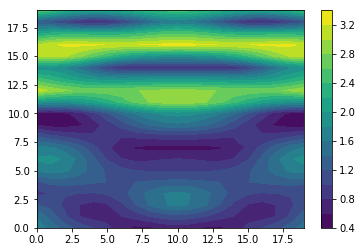

In [104]:
plt.contourf(data, levels = 16)
plt.colorbar()
plt.show()

In [85]:
def data_to_plot_env(y_axis = [-4, 4], d = 1, l = 4, Num = 10):
    data = []
    theta = (d * np.pi)/l
    x_axis = [-l/2, l/2]
    for r in range(1,35):
        k = r/10
        X_m_n = list([[1j*(i == j) + (beta_n(j) - 1j*np.abs(j))*T_m_n(i, j, theta) for i in range(-Num, Num + 1)] for j in range(-Num, Num + 1)])
        B = list([-k*T_m_n(i, 0, theta) for i in range(-Num, Num + 1)])
        A = np.linalg.solve(X_m_n, B)
    
        res = 0
        for i in range(-int(np.abs(np.round(k))), int(np.abs(np.round(k))) + 1):
            res += beta_n(i, k)*np.power(np.linalg.norm(A[i]), 2)/k
        data.append(res)
    return data

In [86]:
data_env = data_to_plot_env()

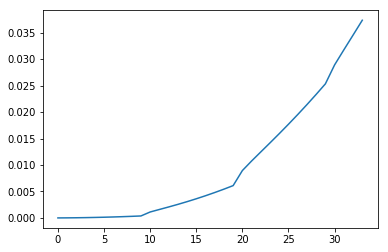

In [87]:
plt.plot(data_env)